<a href="https://colab.research.google.com/github/Amar234/plant_disease/blob/main/plants_disease_crop(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Mounting Dataset From Drive.` 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# `1.Import Libraries.`

In [2]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

# `2.Load Data into Train and Test Variables.`

In [3]:
# My data is in google drive.
test_dir ="/content/drive/MyDrive/plant_disease/Test_Dir-20210117T101806Z-001/Test_Dir"
train_dir="/content/drive/MyDrive/plant_disease/Train_Dir-20210117T101808Z-001/Train_Dir"

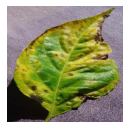

In [4]:
import matplotlib.image as mpimg
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/plant_disease/Train_Dir-20210117T101808Z-001/Train_Dir/Pepper__bell___Bacterial_spot/afd0c913-1e90-4ff9-9a61-bd0a5297c012___JR_B.Spot 3221.JPG")
plt.imshow(img)




# Visualizing The Train and Test Data ..

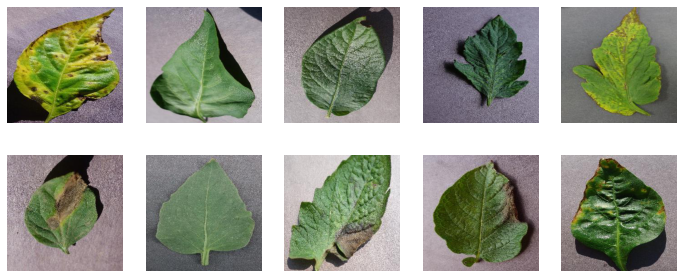

In [6]:
import matplotlib.image as mpimg
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')

img = mpimg.imread("/content/drive/MyDrive/plant_disease/Train_Dir-20210117T101808Z-001/Train_Dir/Pepper__bell___Bacterial_spot/afd0c913-1e90-4ff9-9a61-bd0a5297c012___JR_B.Spot 3221.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/plant_disease/Train_Dir-20210117T101808Z-001/Train_Dir/Pepper__bell___healthy/00208a93-7687-4e8c-b79e-3138687e0f38___JR_HL 7955.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/plant_disease/Train_Dir-20210117T101808Z-001/Train_Dir/Potato___healthy/07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL 5399.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/plant_disease/Train_Dir-20210117T101808Z-001/Train_Dir/Tomato__Tomato_mosaic_virus/1170f108-86a3-4bc6-8a06-c82e55178f91___PSU_CG 2327.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/plant_disease/Train_Dir-20210117T101808Z-001/Train_Dir/Tomato_Bacterial_spot/022e8a4a-9297-4de3-88a5-ee7aa46dd526___UF.GRC_BS_Lab Leaf 8682.JPG")
plt.imshow(img)


sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/plant_disease/Train_Dir-20210117T101808Z-001/Train_Dir/Tomato_Early_blight/01861c93-ea8b-4820-aaa8-cc6003b3e75b___RS_Erly.B 7855.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/plant_disease/Train_Dir-20210117T101808Z-001/Train_Dir/Tomato_healthy/025bc454-a051-42d2-b547-316f8cc3dc55___GH_HL Leaf 297.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/plant_disease/Train_Dir-20210117T101808Z-001/Train_Dir/Tomato_Late_blight/021ca736-df21-458a-9010-fab4803f08fe___RS_Late.B 7010.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/plant_disease/Test_Dir-20210117T101806Z-001/Test_Dir/Potato___Late_blight/04b964fd-7033-4cdf-88ef-b1acbcd8183a___RS_LB 2783.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/plant_disease/Test_Dir-20210117T101806Z-001/Test_Dir/Pepper__bell___Bacterial_spot/01ebc916-4793-40a3-b5e4-a32687e4fa3d___NREC_B.Spot 9125.JPG")
plt.imshow(img)



# `3.Function To count Images In Each Data Set.`

In [7]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [8]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

15 Classes
15602 Train images
4119 Test images


In [9]:
# Preprocessing data.
train_datagen= ImageDataGenerator(rescale=1/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)

In [10]:
# set height and width of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =16
#batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 15601 images belonging to 15 classes.
Found 4119 images belonging to 15 classes.


In [11]:
# The name of the 15 diseases.
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

# `4.CNN Parameter Building.`

In [12]:
# CNN building.
model = Sequential()

model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [13]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


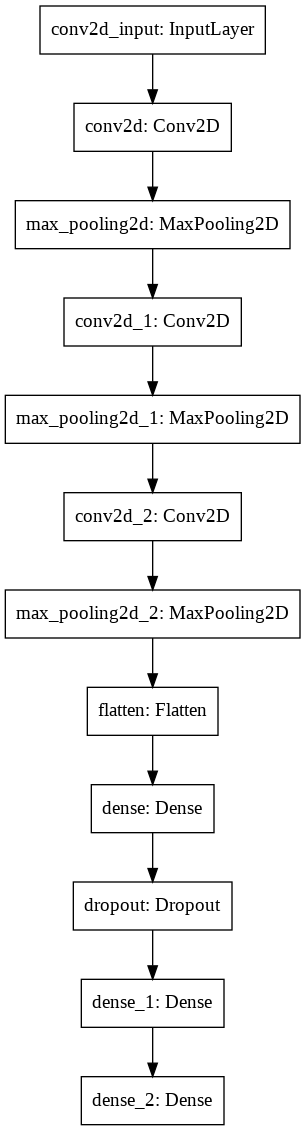

In [14]:
keras.utils.plot_model(model,"my_CNN_model.png")

In [16]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/plant_disease/Train_Dir-20210117T101808Z-001/Train_Dir/Tomato_Spider_mites_Two_spotted_spider_mite/002835d1-c18e-4471-aa6e-8d8c29585e9b___Com.G_SpM_FL 8584.JPG')
#preprocess image
img1 = image.load_img('/content/drive/MyDrive/plant_disease/Train_Dir-20210117T101808Z-001/Train_Dir/Tomato_Spider_mites_Two_spotted_spider_mite/002835d1-c18e-4471-aa6e-8d8c29585e9b___Com.G_SpM_FL 8584.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [17]:
# Visualizing output after every layer.
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)

conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)

conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)

conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)

conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)

conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)


# `5.Visualizing The Image After Every Layer.`

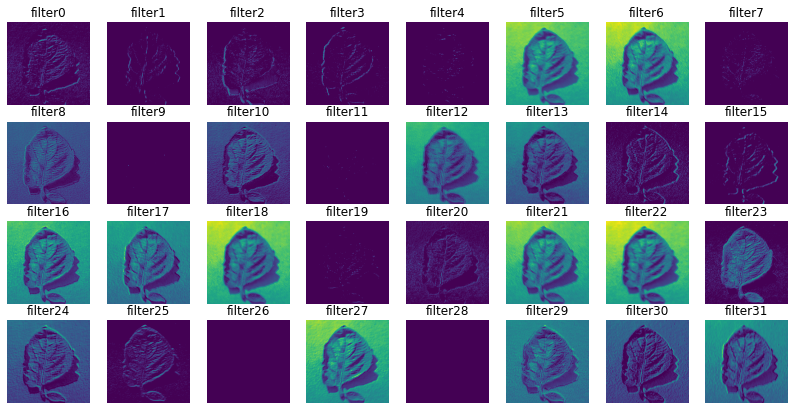

In [18]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

#cmaps['Perceptually Uniform Sequential'] = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

#cmaps['Sequential'] = [
           # 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
           # 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
           # 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

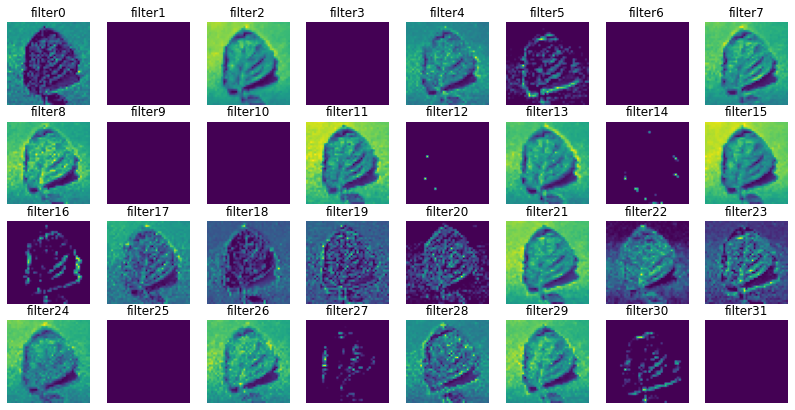

In [19]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

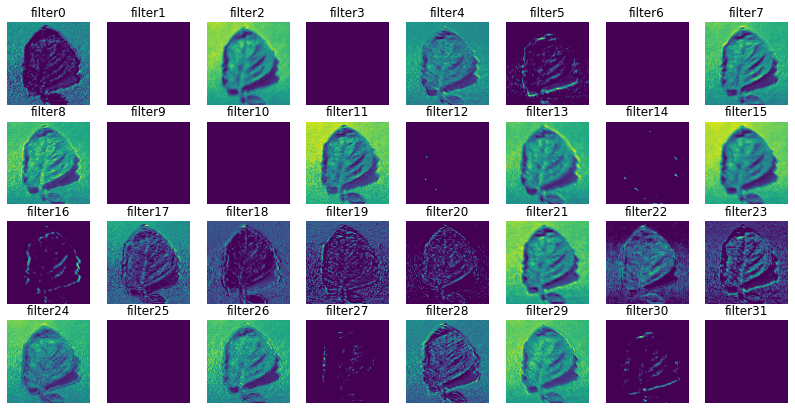

In [20]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

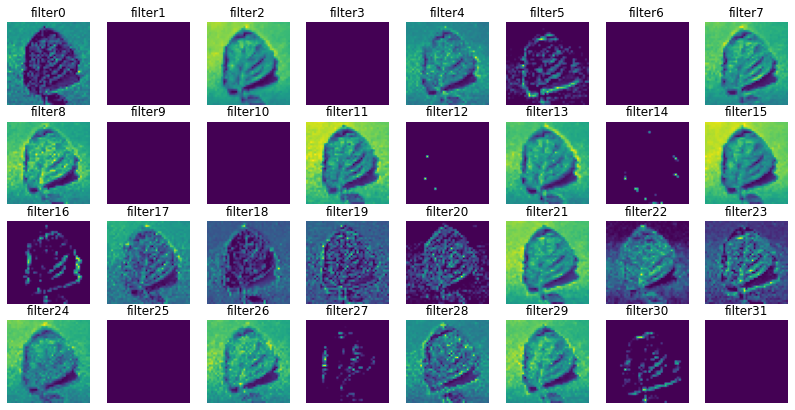

In [22]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

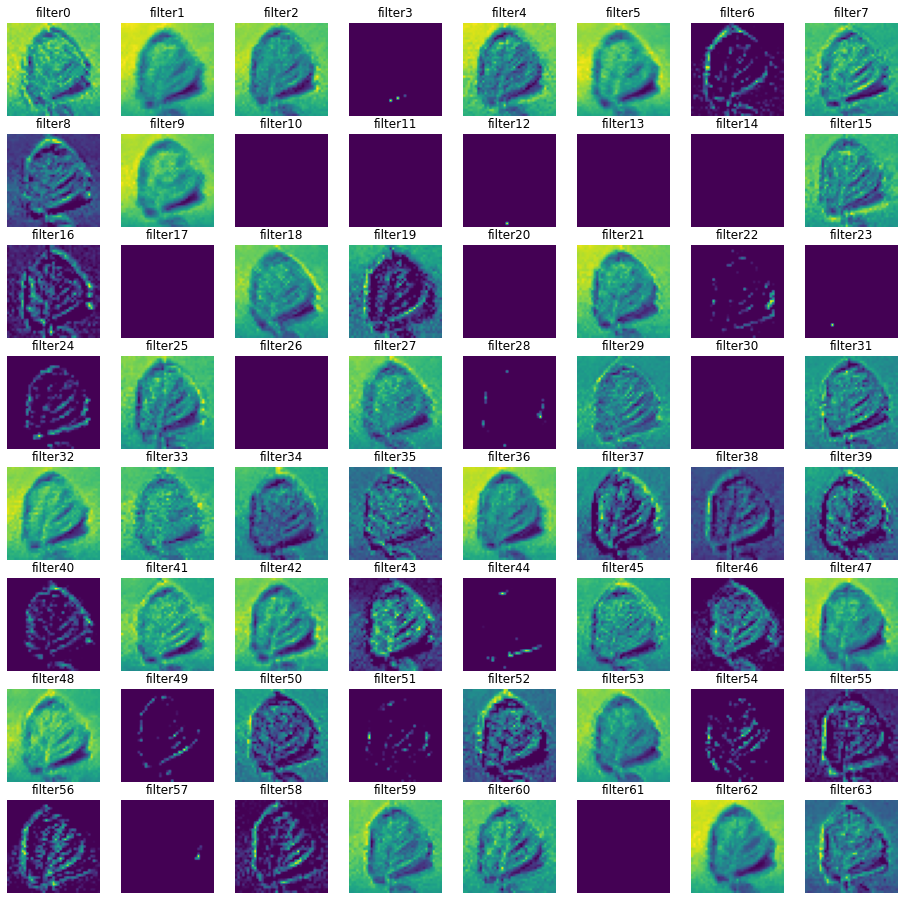

In [23]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

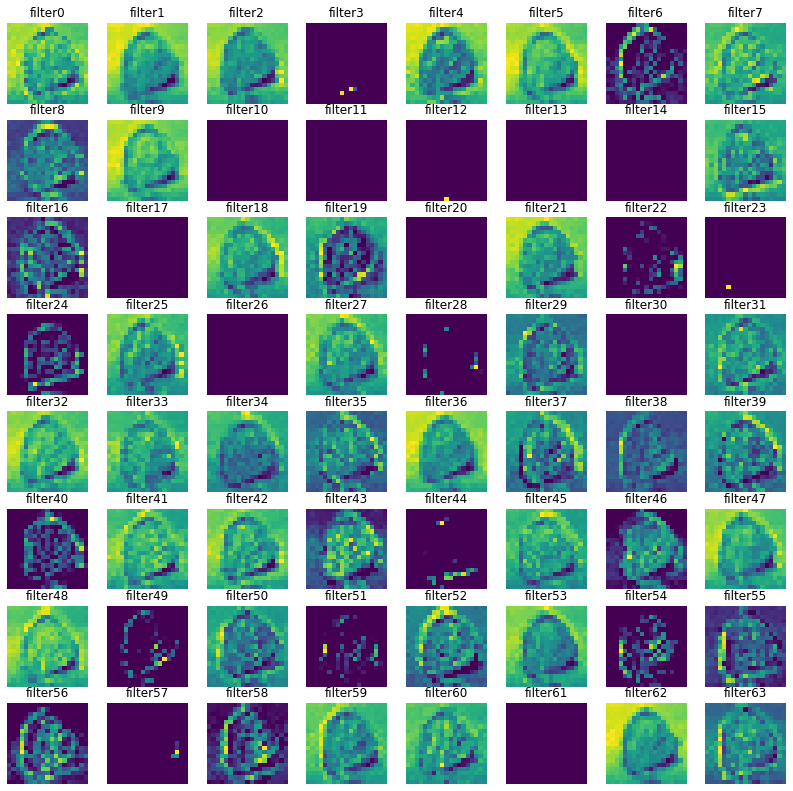

In [24]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()